In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [3]:
from sklearn.datasets import load_diabetes

# load regression dataset
diabetes, target = load_diabetes(return_X_y=True)
diabetes = pd.DataFrame(diabetes)
print(diabetes.shape)
diabetes.head()

(442, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
from sklearn.preprocessing import StandardScaler

# standardize features
diabetes = StandardScaler().fit_transform(diabetes)
pd.DataFrame(data = diabetes).head()

,0,1,2,3,4,5,6,7,8,9
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
diabetes_pca = pca.fit_transform(diabetes)

In [13]:
principal_df = pd.DataFrame(data = diabetes_pca,
                            columns=['Principal Component 1', 'Principal Component 2'])

In [14]:
principal_df.head()

,Principal Component 1,Principal Component 2
0,0.587208,-1.946828
1,-2.831612,1.372085
2,0.272148,-1.634898
3,0.049310,0.382253
4,-0.756451,0.811968


In [15]:
target = pd.DataFrame(data=target, columns=['Target'])

df = pd.concat([principal_df, target], axis=1)
df.head()

,Principal Component 1,Principal Component 2,Target
0,0.587208,-1.946828,151.0
1,-2.831612,1.372085,75.0
2,0.272148,-1.634898,141.0
3,0.049310,0.382253,206.0
4,-0.756451,0.811968,135.0


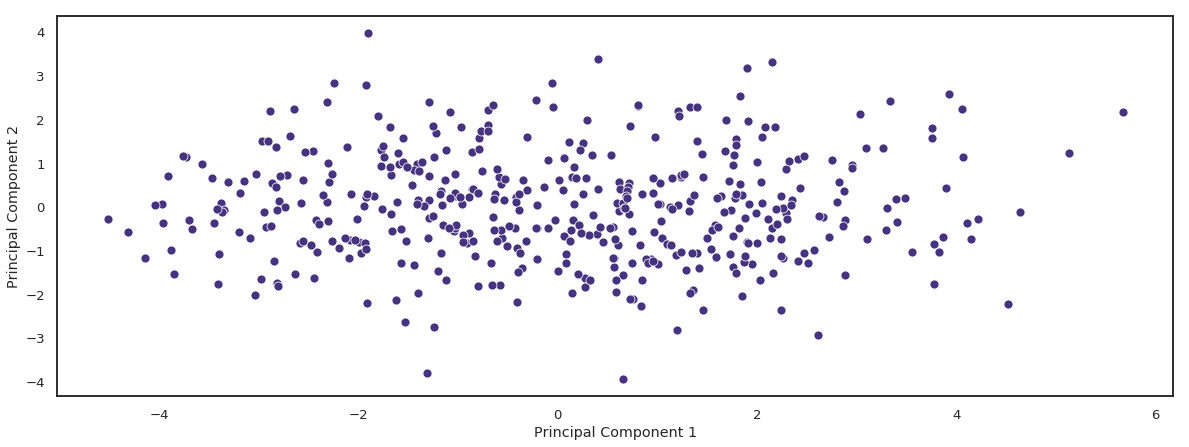

In [16]:
sns.scatterplot(df['Principal Component 1'], df['Principal Component 2'])